In [1]:
import json
from collections import Counter
from pathlib import Path
import random
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import os
from IPython.display import display

In [2]:
path = Path("../data/tomatoes/annotations/instances.json")
with open(path, "r", encoding="utf-8") as f:
    coco = json.load(f)

images = coco["images"]
anns = coco["annotations"]
cats = {c["id"]: c["name"] for c in coco["categories"]}

# aspect ratio
ratios = [img["width"] / img["height"] for img in images if img.get("height", 0) > 0]
avg_ratio = sum(ratios) / len(ratios) if ratios else 0

# average annotations per image
avg_anns_per_img = len(anns) / len(images) if images else 0

# bbox area distribution
small, medium, large = 0, 0, 0
for a in anns:
    if "bbox" not in a:
        continue
    w, h = a["bbox"][2], a["bbox"][3]
    area = w * h
    if area < 32**2:
        small += 1
    elif area < 96**2:
        medium += 1
    else:
        large += 1

# category counts
cat_counts = Counter(a["category_id"] for a in anns)

print(f"images: {len(images)}")
print(f"annotations: {len(anns)}")
print(f"categories: {len(cats)}")
print(f"average aspect ratio: {avg_ratio:.3f}")
print(f"average annotations per image: {avg_anns_per_img:.2f}")
print(f"small boxes: {small}")
print(f"medium boxes: {medium}")
print(f"large boxes: {large}")
print("\nannotations per category:")
for cid, n in cat_counts.most_common():
    print(f"  {cats[cid]}: {n}")


images: 6623
annotations: 44944
categories: 1
average aspect ratio: 0.676
average annotations per image: 6.79
small boxes: 5394
medium boxes: 38002
large boxes: 1548

annotations per category:
  tomato: 44944


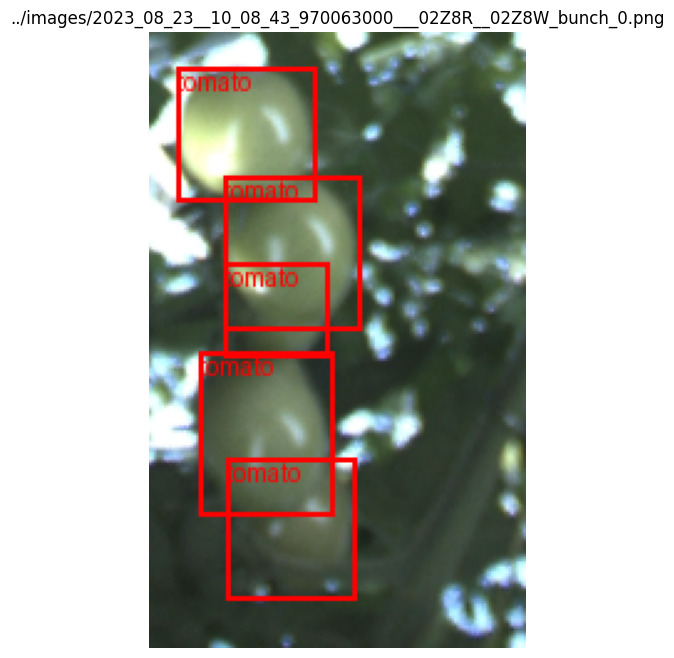

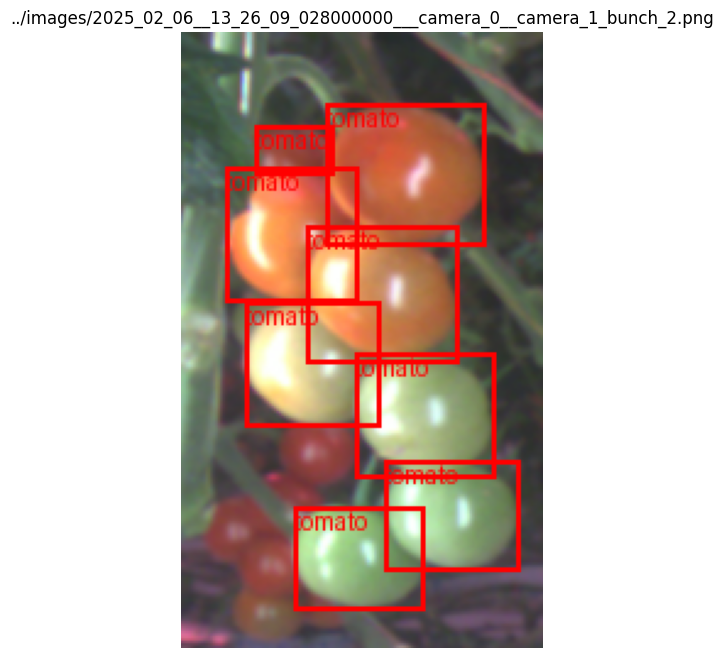

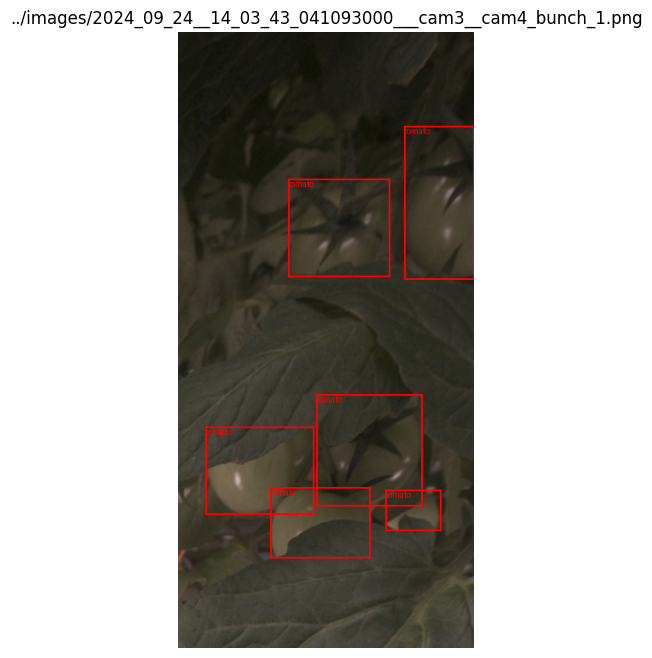

In [3]:
# paths
root = Path("../Data/tomatoes")
ann_path = root / "annotations" / "instances.json"
img_root = root / "images"

# load annotations
with open(ann_path, "r", encoding="utf-8") as f:
    coco = json.load(f)

cats = {c["id"]: c["name"] for c in coco["categories"]}
images = {img["id"]: img for img in coco["images"]}
anns = coco["annotations"]

# group annotations by image_id
ann_by_img = {}
for a in anns:
    ann_by_img.setdefault(a["image_id"], []).append(a)

# pick a few random images
sample_ids = random.sample(list(images.keys()), 3)

for img_id in sample_ids:
    img_info = images[img_id]
    img_path = img_root / img_info["file_name"]  # fixed path
    if not img_path.exists():
        print(f"Missing: {img_path}")
        continue

    im = Image.open(img_path).convert("RGB")
    draw = ImageDraw.Draw(im)

    for a in ann_by_img.get(img_id, []):
        if "bbox" not in a:
            continue
        x, y, w, h = a["bbox"]
        cat = cats.get(a["category_id"], "")
        draw.rectangle([x, y, x + w, y + h], outline="red", width=2)
        draw.text((x, y), cat, fill="red")

    plt.figure(figsize=(8, 8))
    plt.imshow(im)
    plt.axis("off")
    plt.title(img_info["file_name"])
    plt.show(block=False) 
